## Introdução

### Importação de Bibliotecas

In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier

### Carregamento das bases de treino e teste

In [122]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv') 

## Análise Exploratória dos Dados.

#### Estatísticas Descritivas

In [123]:
train_data.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


### Análise das Estatísticas Descritivas

A análise das estatísticas descritivas revela uma distribuição padronizada dos dados numéricos, destacando algumas variações notáveis nos atributos musicais.

**Destaques:**

- **Grande variação na duração das músicas**: As faixas apresentam uma ampla gama de durações, desde músicas extremamente curtas (13 segundos) até faixas longas com até 87 minutos. Essa dispersão evidencia a diversidade presente no conjunto de dados em relação ao tempo de execução das faixas.

- **Loudness negativo**: A presença de valores negativos significativos no nível de loudness, com um mínimo de -49,3 dB, indica a existência de músicas com volumes extremamente baixos, típicos de gêneros mais silenciosos ou experimentais.

- **Tempo (BPM) igual a 0**: A ocorrência de faixas com 0 BPM sugere a presença de músicas ou sons sem ritmo definido, como sons ambientes ou peças experimentais, caracterizadas pela ausência de batidas regulares.

- **Instrumentalness, Speechiness, Liveness e Tempo**: Observa-se uma grande diferença entre o terceiro quartil (75%) e o valor máximo dessas variáveis, o que sugere a existência de **outliers**. Por exemplo:
  - **Instrumentalness**: O terceiro quartil é 0,050, enquanto o valor máximo é 1, sugerindo a presença de músicas altamente instrumentais.
  - **Speechiness**: O terceiro quartil é 0.084500, com um máximo de 0,96, indicando faixas com conteúdo altamente falado.
  - **Liveness**: Com um terceiro quartil de 0,273 e um máximo de 1, há evidências de faixas com grande presença de som ao vivo.
  - **Tempo**: O terceiro quartil é 140,05 BPM, enquanto o máximo é 222,6 BPM, mostrando músicas extremamente rápidas em comparação à média.


#### Resumo das informações da base de dados

In [124]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

A aplicação do método `info()` revela a presença de 21 colunas, sendo 1 do tipo boolean, 9 do tipo float64, 6 int64 e 5 object. Verifica-se a ausência de valores ausentes, o que simplifica o processo de limpeza dos dados.

### Entendimento das Features

In [125]:
train_data.nunique()

track_unique_id      79800
track_id             66720
artists              25775
album_name           37315
track_name           55767
duration_ms          40712
explicit                 2
danceability          1120
energy                1932
key                     12
loudness             17562
mode                     2
speechiness           1454
acousticness          4856
instrumentalness      5252
liveness              1706
valence               1737
tempo                37292
time_signature           5
track_genre            114
popularity_target        2
dtype: int64

O método nunique evidencia um comportamento estranho nos dados: a coluna track_id não possui 79800 registros, ou seja, algumas linhas da base de dados apresentam o mesmo track_id. Sabendo disso, realiza a verificação:

In [126]:
train_data['track_id'].value_counts()

5ftfVzSLIi5ZxYdNbRtf41    7
0WaaPFt4Qy8sVfxKz43bCD    6
434VcYrm3FPRRiW4jw5nLb    6
6bzWr3EpSEolVwlbLk58il    6
1uOe9m9bAiAY4kGnGDu1Ns    6
                         ..
4IBQllOXx6Ct9Bidmj3yyF    1
1x9tZ4qrRHWORqZ6X69WEi    1
7jo1ash37IUB5NyviV7ajO    1
3d93Il9hPa1YJLBMD9xAGd    1
3nic2HyQ0wsLb6IUFWiWu9    1
Name: track_id, Length: 66720, dtype: int64

Nota-se que há IDs que se repetem para até 7 músicas, a partir disso, cabe verificar a razão para essa duplicação. Para isso, verifica-se individualmente uma das colunas com mais que um registro.

In [127]:
train_data.loc[train_data['track_id'] == '5ftfVzSLIi5ZxYdNbRtf41'].head()


,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
7298,2138,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,...,0,0.0328,0.321,0.000281,0.0713,0.437,75.803,4,alt-rock,0
7956,85046,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,...,0,0.0328,0.321,0.000281,0.0713,0.437,75.803,4,punk-rock,0
31378,86090,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,...,0,0.0328,0.321,0.000281,0.0713,0.437,75.803,4,punk,0
40484,38049,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,...,0,0.0328,0.321,0.000281,0.0713,0.437,75.803,4,garage,0
48364,8025,5ftfVzSLIi5ZxYdNbRtf41,The Black Keys,Coffee Moment,Never Gonna Give You Up,218986,False,0.557,0.665,6,...,0,0.0328,0.321,0.000281,0.0713,0.437,75.803,4,blues,0


A repetição observada ocorre devido aos diferentes gêneros musicais associados a uma mesma música na tabela. Para cada gênero musical em que a música se encaixa, ela recebe um registro separado, resultando na duplicação do ID da música.

### Visualização dos Dados

#### 1 - Número de músicas por gêneros musicais

Para descobrir quantas músicas estão associadas a cada gênero, primeiro, precisamos descobrir quantos gêneros estão registrados na base de dados.

In [128]:
print(train_data['track_genre'].nunique(),'gêneros musicais')

114 gêneros musicais


Esse elevado número de gêneros musicais inviabiliza a visualização gráfica de todos os gêneros, dessa forma, vamos analisar os 5 gêneros com mais quantidade de músicas associadas e os 5 com menos.

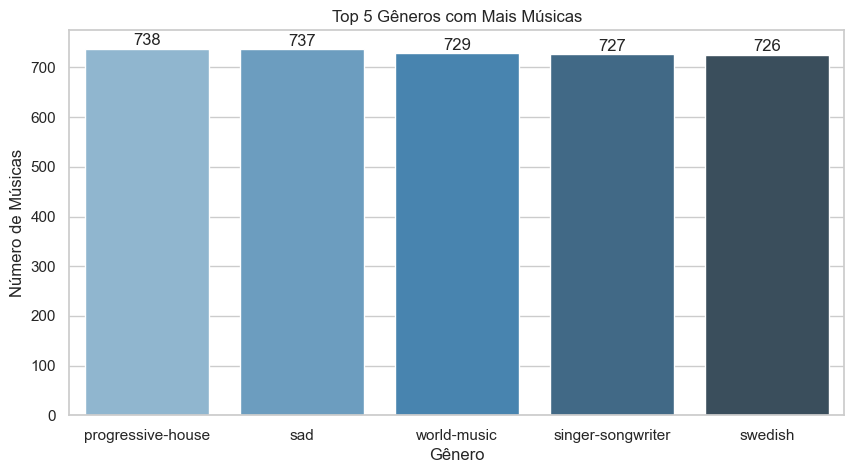

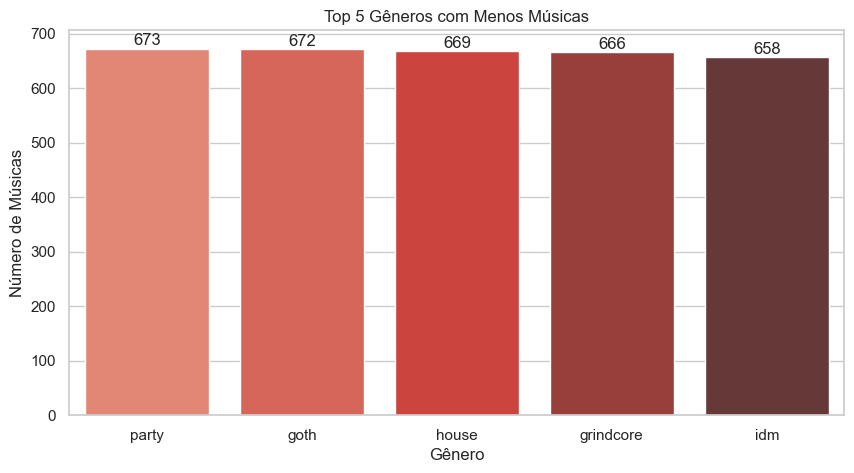

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo: carregando o dataframe (substitua pelo seu próprio dataframe se necessário)
# train_data = pd.read_csv('caminho_para_o_arquivo.csv')

# Contagem de músicas por gênero
genre_counts = train_data['track_genre'].value_counts()

# Gêneros com mais músicas (top 5)
top_5_genres = genre_counts.head(5)

# Gêneros com menos músicas (bottom 5)
bottom_5_genres = genre_counts.tail(5)

# Configuração para melhorar a estética do gráfico com seaborn
sns.set(style="whitegrid")

# Criar o gráfico para os 5 gêneros com mais músicas
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_5_genres.index, y=top_5_genres.values, hue=top_5_genres.index, palette="Blues_d", legend=False)
plt.title('Top 5 Gêneros com Mais Músicas')
plt.xlabel('Gênero')
plt.ylabel('Número de Músicas')

# Adicionar os valores no topo de cada barra
for index, value in enumerate(top_5_genres.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

# Criar o gráfico para os 5 gêneros com menos músicas
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=bottom_5_genres.index, y=bottom_5_genres.values, hue=bottom_5_genres.index, palette="Reds_d", legend=False)
plt.title('Top 5 Gêneros com Menos Músicas')
plt.xlabel('Gênero')
plt.ylabel('Número de Músicas')

# Adicionar os valores no topo de cada barra
for index, value in enumerate(bottom_5_genres.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


A análise da distribuição dos gêneros musicais com base na visualização dos gráficos revela um resultado inesperado: a quantidade de músicas por gênero encontra-se notavelmente equilibrada. A variação entre o gênero mais representado e o menos representado é relativamente pequena, apresentando uma diferença de apenas 90 músicas em um conjunto de dados com 78.900 registros. Esse equilíbrio na distribuição sugere uma uniformidade na presença de diferentes gêneros musicais dentro da base de dados.

#### 2 - Taxa de sucesso das músicas por gênero musical

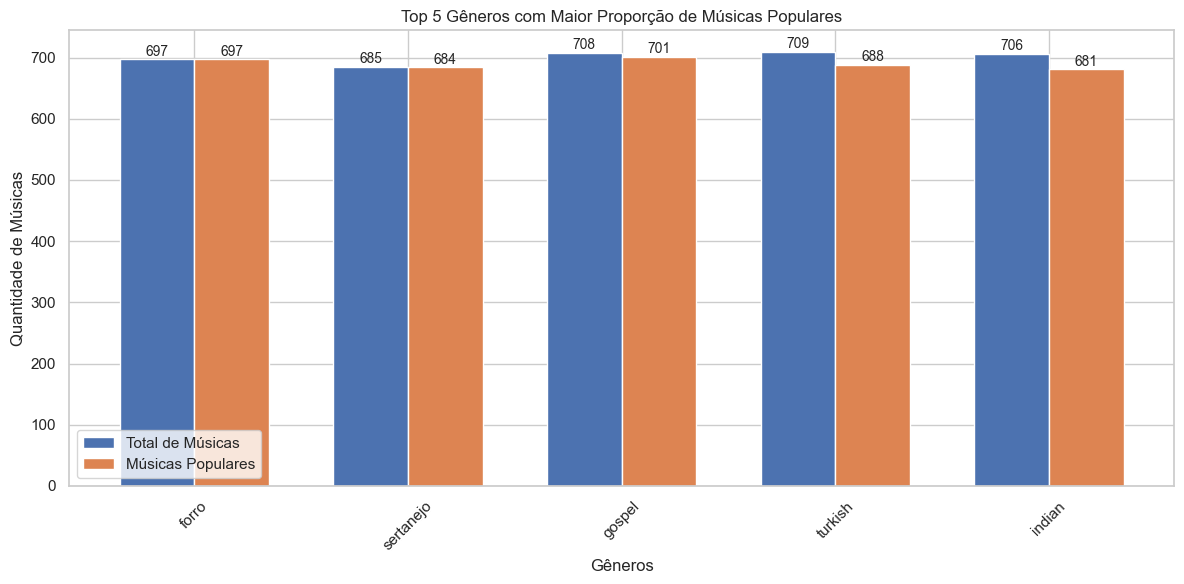

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o dataframe 'train_data' já esteja carregado

# Agrupar por 'track_genre' e calcular total de músicas e músicas populares (popularity_target = 1)
genre_group = train_data.groupby('track_genre').agg(
    total_musicas=('popularity_target', 'size'),
    musicas_populares=('popularity_target', lambda x: (x == 1).sum())
).reset_index()

# Adicionar uma coluna com a taxa de músicas populares
genre_group['taxa_sucesso'] = genre_group['musicas_populares'] / genre_group['total_musicas']

# Selecionar os 5 gêneros com maior taxa de sucesso
top_5_genres = genre_group.sort_values(by='taxa_sucesso', ascending=False).head(5)

# Criar gráfico de barras para o total de músicas e músicas populares
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top_5_genres))

# Barras do total de músicas
total_bar = plt.bar(index, top_5_genres['total_musicas'], bar_width, label='Total de Músicas')

# Barras das músicas populares
populares_bar = plt.bar([i + bar_width for i in index], top_5_genres['musicas_populares'], bar_width, label='Músicas Populares')

# Adicionar os números acima das barras
for i, (total, popular, taxa) in enumerate(zip(top_5_genres['total_musicas'], top_5_genres['musicas_populares'], top_5_genres['taxa_sucesso'])):
    plt.text(i, total + 1, f'{total}', ha='center', va='bottom', fontsize=10)  # Total de músicas
    plt.text(i + bar_width, popular + 1, f'{popular}', ha='center', va='bottom', fontsize=10)  
# Configurações do gráfico
plt.xlabel('Gêneros')
plt.ylabel('Quantidade de Músicas')
plt.title('Top 5 Gêneros com Maior Proporção de Músicas Populares')
plt.xticks([i + bar_width / 2 for i in index], top_5_genres['track_genre'], rotation=45)
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


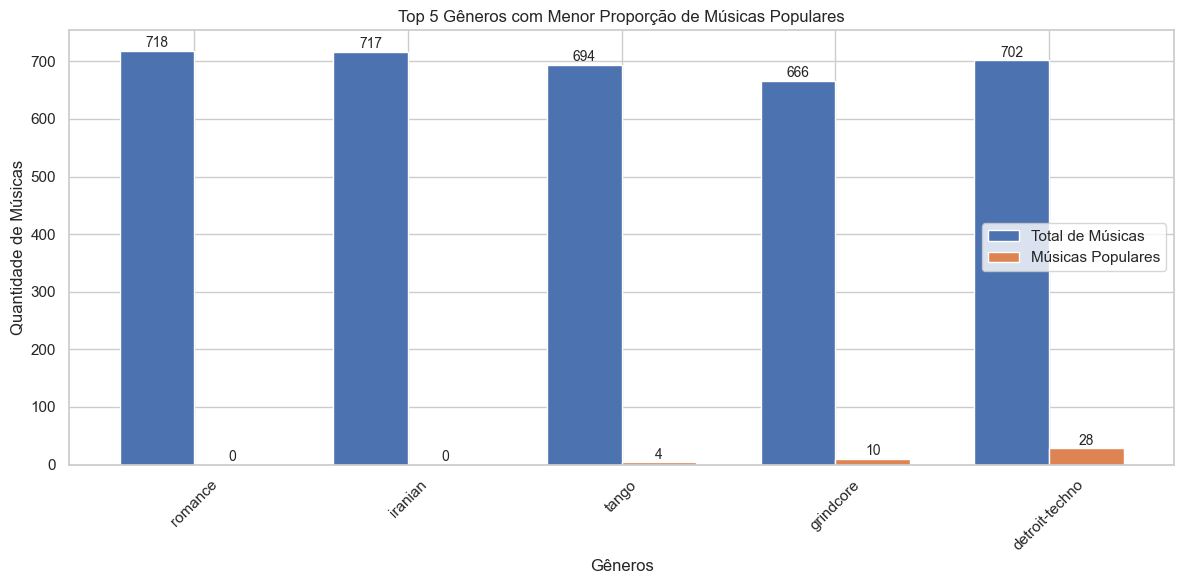

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o dataframe 'train_data' já esteja carregado

# Agrupar por 'track_genre' e calcular total de músicas e músicas populares (popularity_target = 1)
genre_group = train_data.groupby('track_genre').agg(
    total_musicas=('popularity_target', 'size'),
    musicas_populares=('popularity_target', lambda x: (x == 1).sum())
).reset_index()

# Adicionar uma coluna com a taxa de músicas populares
genre_group['taxa_sucesso'] = genre_group['musicas_populares'] / genre_group['total_musicas']

# Selecionar os 5 gêneros com a menor taxa de sucesso
bottom_5_genres = genre_group.sort_values(by='taxa_sucesso', ascending=True).head(5)

# Criar gráfico de barras para o total de músicas e músicas populares
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(bottom_5_genres))

# Barras do total de músicas
total_bar = plt.bar(index, bottom_5_genres['total_musicas'], bar_width, label='Total de Músicas')

# Barras das músicas populares
populares_bar = plt.bar([i + bar_width for i in index], bottom_5_genres['musicas_populares'], bar_width, label='Músicas Populares')

# Adicionar os números acima das barras
for i, (total, popular, taxa) in enumerate(zip(bottom_5_genres['total_musicas'], bottom_5_genres['musicas_populares'], bottom_5_genres['taxa_sucesso'])):
    plt.text(i, total + 1, f'{total}', ha='center', va='bottom', fontsize=10)  # Total de músicas
    plt.text(i + bar_width, popular + 1, f'{popular}', ha='center', va='bottom', fontsize=10)  # Músicas populares

# Configurações do gráfico
plt.xlabel('Gêneros')
plt.ylabel('Quantidade de Músicas')
plt.title('Top 5 Gêneros com Menor Proporção de Músicas Populares')
plt.xticks([i + bar_width / 2 for i in index], bottom_5_genres['track_genre'], rotation=45)
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


Os gráficos apresentados sugerem que o gênero musical exerce uma influência significativa sobre a popularidade das músicas. Observa-se que, em determinados gêneros, quase todas as músicas alcançam sucesso, enquanto em outros, com quantidades semelhantes de músicas, a maioria ou todas não obtêm sucesso. Esses resultados indicam uma possível alta correlação entre o gênero musical e a probabilidade de sucesso das faixas.

#### 3 - Artistas com maior número de músicas de sucesso.

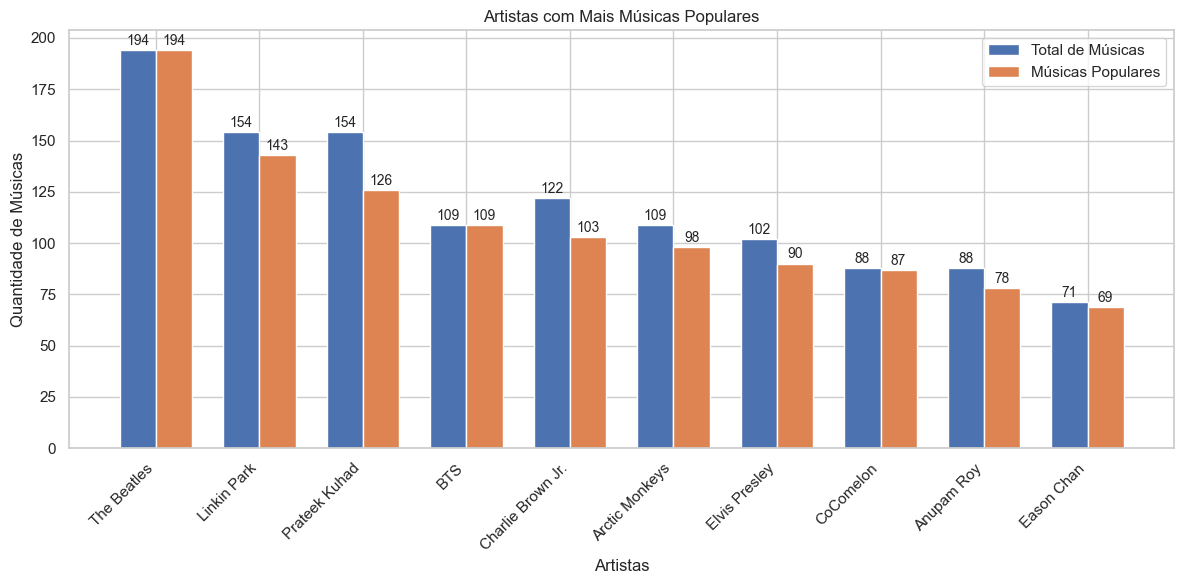

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o dataframe 'train_data' já esteja carregado

# Agrupar por 'artists' e calcular o número total de músicas e músicas populares (popularity_target = 1)
artist_group = train_data.groupby('artists').agg(
    total_musicas=('popularity_target', 'size'),
    musicas_populares=('popularity_target', lambda x: (x == 1).sum())
).reset_index()

# Selecionar os artistas com mais músicas populares
top_artists = artist_group.sort_values(by='musicas_populares', ascending=False).head(10)

# Criar gráfico de barras para o total de músicas e músicas populares
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top_artists))

# Barras do total de músicas
total_bar = plt.bar(index, top_artists['total_musicas'], bar_width, label='Total de Músicas')

# Barras das músicas populares
populares_bar = plt.bar([i + bar_width for i in index], top_artists['musicas_populares'], bar_width, label='Músicas Populares')

# Adicionar os números acima das barras
for i, (total, popular) in enumerate(zip(top_artists['total_musicas'], top_artists['musicas_populares'])):
    plt.text(i, total + 1, f'{total}', ha='center', va='bottom', fontsize=10)  # Total de músicas
    plt.text(i + bar_width, popular + 1, f'{popular}', ha='center', va='bottom', fontsize=10)  # Músicas populares

# Configurações do gráfico
plt.xlabel('Artistas')
plt.ylabel('Quantidade de Músicas')
plt.title('Artistas com Mais Músicas Populares')

# Exibir o nome dos artistas no eixo X
plt.xticks([i + bar_width / 2 for i in index], top_artists['artists'], rotation=45, ha='right')

# Adicionar a legenda
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


Assim como observado na coluna 'track_genre', a visualização do gráfico que relaciona artistas com músicas de sucesso sugere que a coluna 'artista' tem um papel significativo na popularidade das faixas. Artistas renomados, como os Beatles, mostram uma alta proporção de músicas bem-sucedidas, indicando sua forte influência no sucesso das canções.

#### Análise do balanceamento da coluna Popularity Target

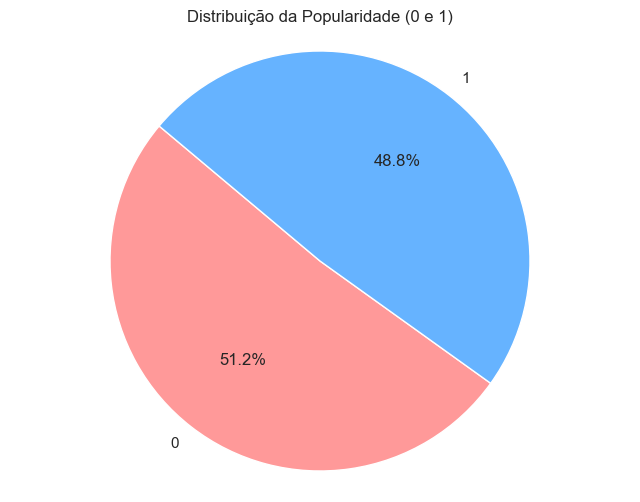

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado train_data
# train_data = pd.read_csv('seu_arquivo.csv')  # Carregar os dados, se necessário

# Contar a quantidade de 0s e 1s na coluna 'popularity target'
popularity_counts = train_data['popularity_target'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(popularity_counts, labels=popularity_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribuição da Popularidade (0 e 1)')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja circular
plt.show()


O gráfico acima mostra que a coluna "popularity target" está bem balanceada, indicando que não será necessário utilizar técnicas de balanceamento.

## Formulação de Hipóteses

A hipótese de que músicas com conteúdo explícito são menos populares se baseia em barreiras de acesso e aceitação. Plataformas de mídia frequentemente restringem esse tipo de conteúdo, limitando sua exposição, enquanto o público tende a preferir músicas com temas mais neutros, ampliando a popularidade dessas faixas. 

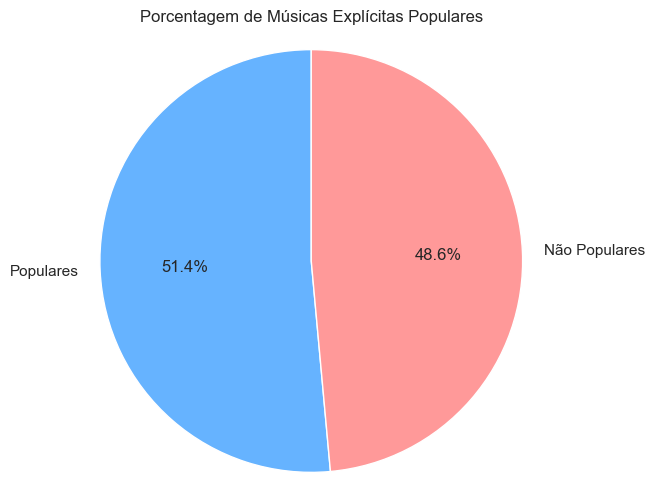

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que a base de dados 'train_data' já está carregada em um DataFrame
# Substitua pelo caminho ou nome correto, se necessário
# train_data = pd.read_csv('caminho_para_o_arquivo.csv')

# Filtrar músicas explícitas
explicit_songs = train_data[train_data['explicit'] == 1]

# Contar as músicas populares (popularity_target == 1) e não populares (popularity_target == 0)
popularity_target_counts = explicit_songs['popularity_target'].value_counts()

# Extrair contagem de populares e não populares
popular_songs = popularity_target_counts.get(1, 0)  # Se não houver, retorna 0
non_popular_songs = popularity_target_counts.get(0, 0)  # Se não houver, retorna 0

# Dados para o gráfico
labels = ['Populares', 'Não Populares']
sizes = [popular_songs, non_popular_songs]

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Porcentagem de Músicas Explícitas Populares')
plt.axis('equal')  # Assegura que o gráfico seja circular
plt.show()


O gráfico de distribuição, com uma divisão de 51,4% para músicas populares e 48,6% para não populares entre aquelas com conteúdo explícito, refuta a hipótese de que a maioria dessas músicas não seria popular. Apesar das expectativas de que barreiras de acesso e aceitação ao conteúdo explícito reduziriam sua popularidade, os dados indicam uma leve predominância de músicas explícitas que são populares. Isso sugere que, apesar das possíveis restrições de distribuição e preferências do público, músicas com conteúdo explícito ainda conseguem atingir um nível significativo de sucesso comercial.

#### 2 - Músicas mais longas (maior duração) são menos populares
Músicas com maior duração podem ser menos populares, pois o público atual tende a preferir faixas mais curtas e concisas, especialmente em plataformas de streaming onde a retenção de atenção é um fator importante.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_13588\1693894954.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Tipo de Música', y='Popularidade Média', data=data, palette=['lightblue', 'orange'])


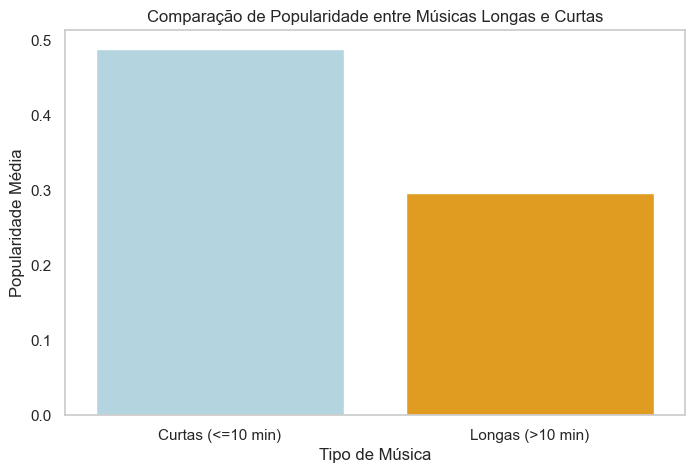

In [135]:
# Converter a duração de milissegundos para minutos
train_data['duration_minutes'] = train_data['duration_ms'] / 60000

# Filtrar músicas longas (duração > 10 minutos)
long_songs = train_data[train_data['duration_minutes'] > 10]

# Filtrar músicas curtas (duração <= 10 minutos)
short_songs = train_data[train_data['duration_minutes'] <= 10]

# Calcular a média de popularidade
mean_popularity_long = long_songs['popularity_target'].mean()
mean_popularity_short = short_songs['popularity_target'].mean()

# Preparar os dados para o gráfico
data = pd.DataFrame({
    'Tipo de Música': ['Curtas (<=10 min)', 'Longas (>10 min)'],
    'Popularidade Média': [mean_popularity_short, mean_popularity_long]
})

# Criar um gráfico de barras
plt.figure(figsize=(8, 5))

# Criar o gráfico de barras e especificar as cores
bars = sns.barplot(x='Tipo de Música', y='Popularidade Média', data=data, palette=['lightblue', 'orange'])

# Ajustar o título e os rótulos
plt.title('Comparação de Popularidade entre Músicas Longas e Curtas')
plt.xlabel('Tipo de Música')
plt.ylabel('Popularidade Média')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

 As músicas com duração superior a 10 minutos apresentam uma média de popularidade de aproximadamente 0,3, enquanto as músicas mais curtas, com até 10 minutos, alcançam uma média de 0,5. Essa diferença significativa sugere que o público atual tende a preferir faixas mais concisas e diretas, possivelmente devido à menor capacidade de retenção de atenção em plataformas de streaming e à busca por uma experiência musical mais dinâmica. Portanto, essa análise corrobora a hipótese de que músicas mais longas são, de fato, menos populares no contexto contemporâneo de consumo musical.

#### 3 - O gênero mais populares são os com maiores 'danceability'
Diferentes gêneros musicais são conhecidos por sua capacidade de fazer o público dançar e pela energia que transmitem. Por exemplo, música eletrônica e pop tendem a ser mais dançantes e energéticas do que gêneros como música clássica ou jazz.

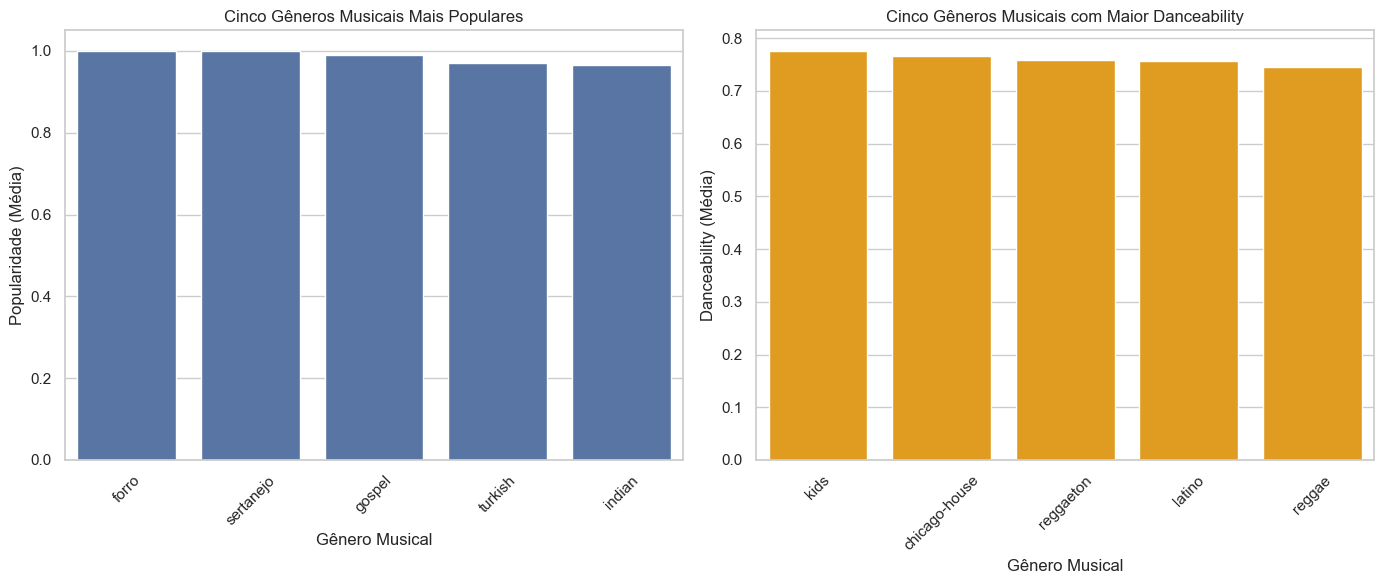

In [136]:
# Calcular a média de popularidade e danceability por gênero
mean_popularity = train_data.groupby('track_genre')['popularity_target'].mean().reset_index()
mean_danceability = train_data.groupby('track_genre')['danceability'].mean().reset_index()

# Obter os cinco gêneros mais populares
top_popular_genres = mean_popularity.nlargest(5, 'popularity_target')

# Obter os cinco gêneros com maior danceability
top_danceable_genres = mean_danceability.nlargest(5, 'danceability')

# Configurar o gráfico
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico de barras para os gêneros mais populares
sns.barplot(ax=axes[0], x='track_genre', y='popularity_target', data=top_popular_genres)
axes[0].set_title('Cinco Gêneros Musicais Mais Populares')
axes[0].set_xlabel('Gênero Musical')
axes[0].set_ylabel('Popularidade (Média)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para os gêneros com maior danceability
sns.barplot(ax=axes[1], x='track_genre', y='danceability', data=top_danceable_genres, color='orange')  # Cor alterada
axes[1].set_title('Cinco Gêneros Musicais com Maior Danceability')
axes[1].set_xlabel('Gênero Musical')
axes[1].set_ylabel('Danceability (Média)')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()


A análise dos dados sobre gêneros musicais revela uma discrepância significativa entre os gêneros mais populares e aqueles que apresentam os maiores índices de "danceability". Os cinco gêneros mais populares identificados na amostra foram forró, sertanejo, gospel, turkish e indian. Em contraste, os gêneros que se destacaram por sua maior "danceability" foram kids, chicago house, reggaeton latino e reggae.

Esta discrepância sugere que a popularidade de um gênero musical não necessariamente se correlaciona com sua capacidade de ser dançante. Enquanto gêneros como forró e sertanejo são amplamente consumidos e apresentam uma forte presença nas paradas musicais, eles não estão entre os que favorecem uma experiência de dança intensa, como evidenciado pelos gêneros com maior "danceability". Por outro lado, gêneros como reggaeton e chicago house demonstram características que incentivam a dança, mas podem não ter o mesmo nível de popularidade massiva.

## Limpeza de Dados

### Tratamento de valores nulos
Durante a análise exploratória do conjunto de dados denominado 'train_data', foi constatado que não existem valores ausentes. Essa verificação é essencial, pois a presença de dados nulos pode impactar negativamente a precisão das análises subsequentes e a construção de modelos preditivos. A ausência de valores nulos indica que os dados estão completos, o que proporciona uma base sólida para as próximas etapas da análise. 

In [137]:
# Confere se realmente não existem valores nulos na tabela de treino
train_data.isnull().sum()

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
duration_minutes     0
dtype: int64

O método isnull().sum() confirma a ausência de valores nulos em toda a tabela de treino. Agora, verifica-se se na coluna de test também não existem valores ausentes:

In [138]:
test_data.isnull().sum()

track_unique_id     0
track_id            0
artists             1
album_name          1
track_name          1
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Diferentemente da coluna de treino, na coluna de teste foram identificados valores ausentes nas colunas 'artists', 'track_name' e 'album_name'. Como apenas um registro de cada uma dessas colunas está ausente, vamos optar por preencher esses valores ausentes com 'unknown'

In [139]:
test_data.fillna('unknown', inplace=True)
test_data.isnull().sum()

track_unique_id     0
track_id            0
artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Dessa forma, agora não existem mais valores ausentes na tabela.

#### Duplicatas

In [140]:
print(train_data.duplicated().sum(),'duplicatas')
print(test_data.duplicated().sum(),'duplicatas')

0 duplicatas
0 duplicatas


O código acima verifica a existência de linhas duplicadas na base de dados, como não existem, segue-se a limpeza.

### Outliers

(16,)


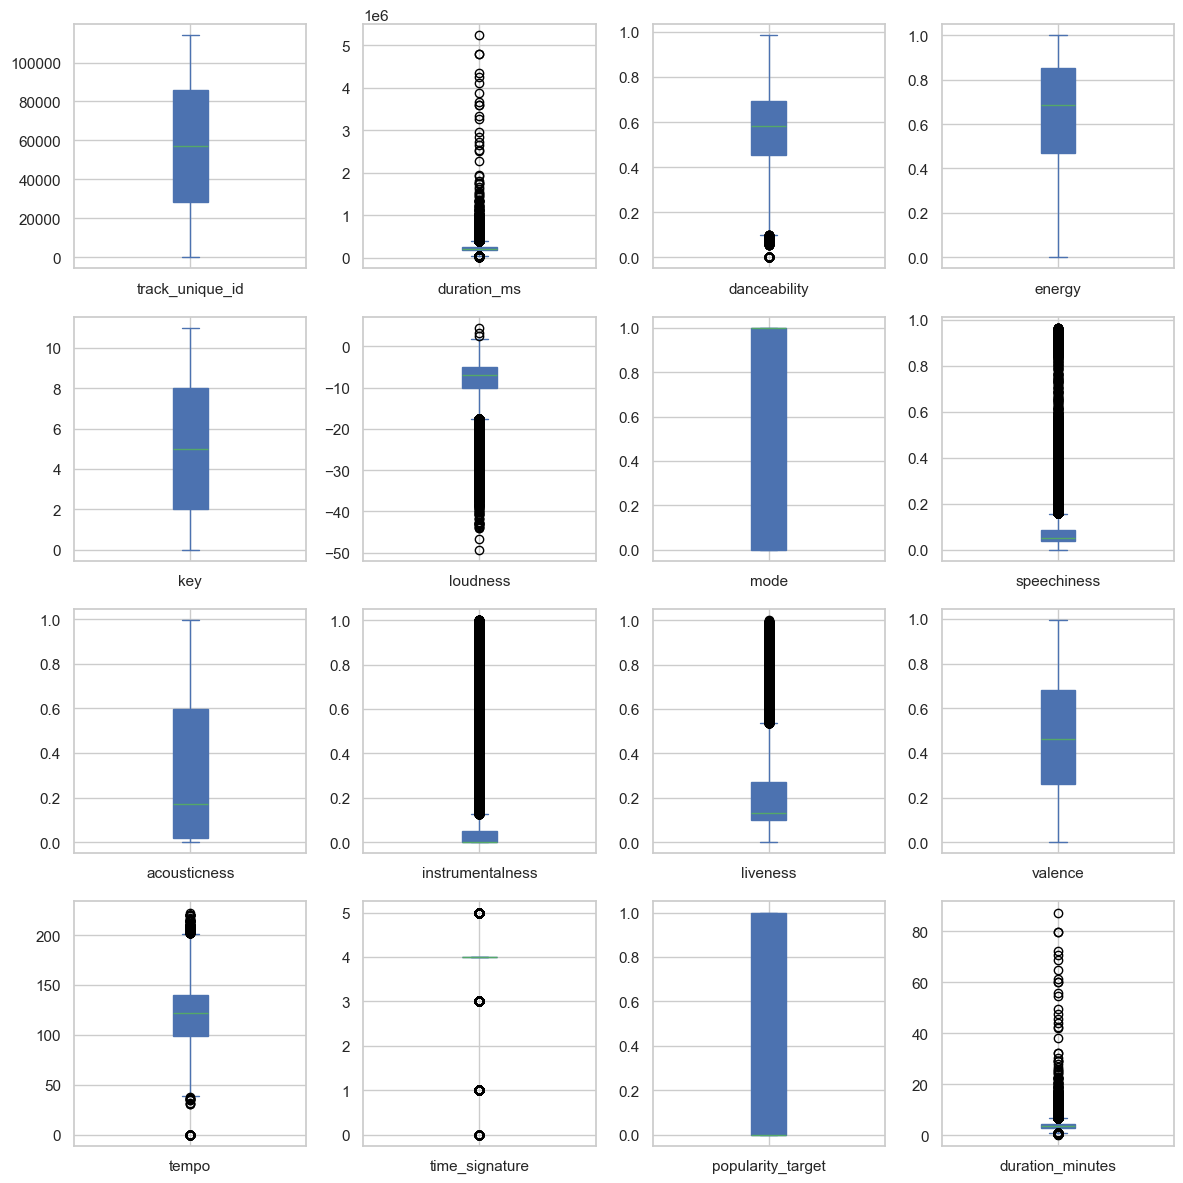

In [141]:
numerical_cols = train_data.select_dtypes(include=[np.number]).columns

# Exibir a quantidade de colunas numéricas
print(numerical_cols.shape)

# Criar boxplots para colunas numéricas
train_data[numerical_cols].plot(
    kind='box',
    subplots=True,
    layout=(4, 4),  # Ajuste o layout para acomodar 16 gráficos
    figsize=(12, 12),  # Aumenta o tamanho da figura para melhor visualização
    patch_artist=True
)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


No gráfico boxplot, os outliers são definidos como todos os pontos que se encontram acima do limite superior, que é estabelecido como o terceiro quartil (Q3) mais 1,5 vezes o intervalo interquartil (IQR). A análise dos dados revelou a presença de outliers nas variáveis *duration*, *danceability*, *speechiness*, *loudness*, *instrumentalness*, *tempo* e *time signature*. Embora os outliers possam ser frequentemente considerados ruído nos dados, neste contexto, eles podem desempenhar um papel significativo na modelagem. Por exemplo, a presença de músicas com duração superior a 30 minutos pode indicar uma menor probabilidade de popularidade, um padrão que pode ser relevante para a compreensão do comportamento do público. Assim, ao invés de remover esses outliers, a decisão inicial é preservá-los, uma vez que sua inclusão pode enriquecer o modelo e auxiliar na identificação de padrões importantes dentro do conjunto de dados.

## Feature engineering

Após a realização da limpeza dos dados, com o objetivo de aprimorar o modelo e identificar padrões ocultos na base de dados, são adotadas técnicas de *feature engineering*. Isso inclui a criação de novas variáveis e a adaptação de variáveis já existentes.

### Criação da categoria ``genre_group`` 

Na base de dados, nota-se a existência de muitos gêneros musicais que, ou estão associados a um outro gênero, ou é muito próximo de algum outro gênero, por isso, opta-se por adicionar uma nova feature que indica a qual grupo maior, cada gênero está relacionado:


In [142]:
genre_groups = {
    'pop': ['pop', 'indie-pop', 'power-pop', 'pop-film', 'synth-pop', 'k-pop', 'cantopop', 'mandopop'],
    'rock': ['rock', 'alt-rock', 'punk', 'punk-rock', 'hard-rock', 'psych-rock', 'indie', 'emo', 'rockabilly', 'grunge', 
             'metalcore', 'hardcore', 'black-metal', 'heavy-metal', 'death-metal', 'metal', 'industrial', 'groove', 'alternative'],
    'electronic': ['electronic', 'edm', 'techno', 'house', 'minimal-techno', 'detroit-techno', 'deep-house', 
                   'progressive-house', 'trance', 'chill', 'dubstep', 'trip-hop', 'breakbeat', 'hardstyle', 'garage', 'idm', 
                   'ambient', 'drum-and-bass', 'chicago-house', 'electro'],
    'hiphop_rnb': ['hip-hop', 'r-n-b', 'rap', 'funk', 'soul'],
    'classical_instrumental': ['classical', 'opera', 'piano', 'singer-songwriter', 'songwriter', 'guitar'],
    'regional_traditional': ['forro', 'mpb', 'pagode', 'brazil', 'sertanejo', 'samba', 'folk', 'bluegrass', 'country', 'honky-tonk', 
                             'gospel', 'afrobeat', 'tango', 'latin', 'latino', 'reggaeton', 'reggae', 'dub', 'salsa', 
                             'world-music', 'turkish', 'iranian', 'malay', 'indian', 'spanish', 'french', 'german', 'swedish', 
                             'british'],
    'jazz_blues': ['jazz', 'blues', 'chill'],
    'children': ['children', 'disney', 'kids'],
    'soundtrack_thematic': ['show-tunes', 'anime', 'comedy', 'happy', 'sad', 'study', 'sleep', 'party', 'romance', 'new-age'],
    'metal': ['black-metal', 'death-metal', 'heavy-metal', 'metalcore', 'grindcore']
}


def map_genre(genre, genre_groups):
    for group, genres in genre_groups.items():
        if genre in genres:
            return group
    return 'other'  

train_data['genre_group'] = train_data['track_genre'].apply(map_genre, genre_groups=genre_groups)
test_data['genre_group'] = test_data['track_genre'].apply(map_genre, genre_groups=genre_groups)

print(train_data[['track_genre', 'genre_group']].head())

  track_genre             genre_group
0        goth                   other
1       opera  classical_instrumental
2         idm              electronic
3   classical  classical_instrumental
4      techno              electronic


### Combinação de features categóricas.

Durante a análise exploratória e a validação de hipóteses, observou-se que as colunas *track_genre* e *artists* apresentam uma alta correlação com a popularidade das músicas. Em decorrência desse entendimento, foram criadas novas características que relacionam essas variáveis categóricas à coluna *album_name*, a qual também é considerada relevante para a análise. O objetivo dessa abordagem é aprimorar o desempenho do modelo, possibilitando uma melhor compreensão das interações entre essas variáveis e sua influência na popularidade das músicas.

In [143]:
def calculate_combined_features(train_data, test_data, features):    
    for group_by, count_column, new_feature_name in features:
        combined_data = pd.concat([train_data[[group_by, count_column]], 
                                   test_data[[group_by, count_column]]])
        
        unique_counts = combined_data.groupby(group_by)[count_column].nunique()
        
        for dataset in [train_data, test_data]:
            dataset[f'{new_feature_name}_combined'] = dataset[group_by].map(unique_counts)
    
    return train_data, test_data

features = [
    ('album_name', 'track_unique_id', 'num_songs_per_album'),
    ('artists', 'track_unique_id', 'num_song_per_artist'),
    ('track_genre', 'album_name', 'num_album_per_genre'),
    ('artists', 'album_name', 'num_album_per_artist'),
    ('album_name', 'track_genre', 'num_genres_per_album'),
    ('artists', 'track_genre', 'num_genres_per_artist'),
    ('genre_group', 'track_unique_id', 'num_songs_per_genre_group')
]
# Uso da função
train_data, test_data = calculate_combined_features(train_data, test_data, features)


O código apresentado tem como objetivo enriquecer os conjuntos de dados de treinamento e teste com informações adicionais que podem melhorar a precisão das previsões de um modelo. A função `calculate_combined_features` percorre uma lista de características definidas, cada uma contendo informações sobre como agrupar os dados (por exemplo, por artista ou álbum) e como contar as músicas associadas a esses grupos. A função combina os dados de treinamento e teste para garantir consistência nas contagens e, em seguida, calcula quantas músicas únicas estão relacionadas a cada grupo. As novas características geradas, como "número de músicas por álbum" ou "número de álbuns por artista", são adicionadas aos conjuntos de dados originais, proporcionando insights que podem ajudar o modelo a identificar padrões relevantes nos dados.

### Criação da feature 'num_of_genders'

Durante o desenvolvimento do projeto, observou-se que músicas com mais de um gênero associado eram listadas várias vezes, uma para cada gênero. Ao agrupar as músicas pelo ID, é possível contabilizar a quantidade de gêneros associados a cada música. Essa informação adicional pode enriquecer os dados e contribuir para resultados mais eficazes do modelo.








In [144]:
train_data['num_of_genders'] = train_data['track_id'].map(train_data['track_id'].value_counts())
test_data['num_of_genders'] = test_data['track_id'].map(test_data['track_id'].value_counts())

#### Tratamento da coluna artists

Na descrição dos dados do Kaggle, é indicado que as músicas podem ter mais de um artista, sendo os nomes separados por ponto e vírgula. Para que cada artista seja tratado individualmente, as colunas correspondentes são divididas utilizando o método str.split(';'). Em seguida, a função explode é aplicada para gerar uma nova linha para cada artista associado a uma música.

In [145]:
train_data['artists'] = train_data['artists'].str.split(';')
train_data = train_data.explode('artists')
test_data['artists'] = test_data['artists'].str.split(';')
test_data = test_data.explode('artists')

Dessa forma, cada artista passa a ser representado em uma linha separada, permitindo uma análise mais detalhada e individualizada das informações relacionadas a cada música.

A partir dessa separação individual de artistas, é possível contabilizar quantos artistas estão associados a cada canção:

In [146]:
train_data['num_artists'] = train_data.groupby('track_unique_id')['artists'].transform('count')
test_data['num_artists'] = test_data.groupby('track_unique_id')['artists'].transform('count')

Além disso, com essa separação de artistas, pode ser realizada a combinação de novas variáveis numéricas. Para isso, utiliza-se a função ``calculate_combined_features``, já mencionada.

In [147]:
new_features = [('album_name', 'artists', 'num_artists_per_album'),
                ('track_genre', 'artists', 'num_artists_per_genre')
                ]
train_data, test_data = calculate_combined_features(train_data, test_data, new_features)

### Combinação de features numéricas


A combinação de features numéricas é uma estratégia fundamental para otimizar o desempenho do modelo, permitindo a criação de novas variáveis que capturam interações relevantes entre as características existentes. Por isso, cria-se uma função para a realização das variáveis numéricas presentes na base de dados.


**OBS: A criação das features é condicionada ao seu impacto no modelo; caso a aplicação de uma nova feature resultasse em um aumento na acurácia, essa feature era mantida. Caso contrário, optou-se por removê-la.**

In [148]:
def create_interaction_columns(data, interactions):
    for col1, col2, new_col in interactions:
        data[new_col] = data[col1] * data[col2]

# Definindo as interações entre as variáveis
interactions = [
    ('energy', 'valence', 'energy_valence'),
    ('tempo', 'duration_ms', 'tempo_duration'),
    ('instrumentalness', 'liveness', 'instrumentalness_liveness'),
    ('acousticness', 'speechiness', 'acousticness_speechiness'),
    ('danceability', 'energy', 'danceability_energy'),
    ('tempo', 'danceability', 'tempo_danceability'),
    ('loudness', 'energy', 'loudness_energy'),
    ('danceability', 'valence', 'danceability_valence'),
    ('acousticness', 'instrumentalness', 'acousticness_instrumentalness'),
    ('danceability', 'loudness', 'danceability_loudness'),
    ('valence', 'duration_ms', 'valence_duration'),
    ('valence','liveness','liveness_valence')
    
]

# Aplicando a função para criar as colunas no conjunto de dados de treino e teste
create_interaction_columns(train_data, interactions)
create_interaction_columns(test_data, interactions)

Essa medida resultou em features que aumentaram o desempenho do modelo.

### Combinação de features numéricas e categóricas.

A combinação de features numéricas e categóricas é uma abordagem que visa integrar diferentes tipos de dados, potencializando a capacidade preditiva do modelo ao capturar interações significativas entre essas variáveis. Dessa forma, utiliza-se a estratégia de pegar a média das colunas variáveis para cada coluna categórica julgada importante.

In [149]:
def calculate_mean_features(train_data, test_data):
    features = [
        ('track_genre', 'danceability', 'mean_danceability_per_genre'),
        ('album_name', 'tempo', 'mean_tempo_per_album'),
        ('album_name', 'danceability', 'mean_danceability_per_album'),
        ('artists', 'valence', 'mean_valence_per_artist'),
        ('artists','danceability','mean_danceability_per_artist'),
        ('album_name','valence','mean_valence_per_album'),
        ('artists','tempo','mean_tempo_per_artist'),
        ('track_genre','valence','mean_valence_per_genre'),
        ('track_genre','tempo','mean_tempo_per_genre'),
        ('track_genre','duration_ms','mean_duration_per_genre'),
        ('album_name','duration_ms','mean_duration_per_album'),
        ('artists','duration_ms','mean_duration_per_artist'),
        ('album_name','instrumentalness','mean_instrumentalness_per_album')

    ]
    
    for group_by, feature, new_feature_name in features:
        mean_feature = train_data.groupby(group_by)[feature].mean()
        
        for dataset in [train_data, test_data]:
            dataset[new_feature_name] = dataset[group_by].map(mean_feature)
    
    return train_data, test_data

# Uso da função
train_data, test_data = calculate_mean_features(train_data, test_data)
test_data.isnull().sum()

track_unique_id                           0
track_id                                  0
artists                                   0
album_name                                0
track_name                                0
duration_ms                               0
explicit                                  0
danceability                              0
energy                                    0
key                                       0
loudness                                  0
mode                                      0
speechiness                               0
acousticness                              0
instrumentalness                          0
liveness                                  0
valence                                   0
tempo                                     0
time_signature                            0
track_genre                               0
genre_group                               0
num_songs_per_album_combined              0
num_song_per_artist_combined    

Essa medida resultou em features que aumentaram o desempenho do modelo.

## Codificação de Variáveis

A tabela a seguir classifica as colunas do conjunto de dados de acordo com seu tipo, distinguindo entre variáveis numéricas e categóricas. Ela será base para as medidas adotadas em cada uma das variáveis.


| **Coluna**           | **Tipo**     |
|----------------------|--------------|
| track_id             | Categórica   |
| artists              | Categórica   |
| album_name           | Categórica   |
| track_name           | Categórica   |
| duration_ms          | Numérica     |
| explicit             | Categórica   |
| danceability         | Numérica     |
| energy               | Numérica     |
| key                  | Categórica   |
| loudness             | Numérica     |
| mode                 | Categórica   |
| speechiness          | Numérica     |
| acousticness         | Numérica     |
| instrumentalness     | Numérica     |
| liveness             | Numérica     |
| valence              | Numérica     |
| tempo                | Numérica     |
| time_signature       | Categórica   |
| track_genre          | Categórica   |
| popularity_target     | Categórica   |

As novas colunas criadas não estão listadas mas serão devidamente tratádas de acordo com seu tipo

### Codificação das variáveis categóricas.

Nesse tema, a primeira medida a ser adotada é a binarização da variável explicit, tratada inicialmente como ``boolean`` 

In [150]:
train_data['explicit'] = train_data['explicit'].astype(int)
test_data['explicit'] = test_data['explicit'].astype(int)

Em sequência, adota-se uma abordagem diferente para a codificação das variáveis `track_genre`, `artists`, `album_name` e `genre_group`. A técnica escolhida é o **Target Encoder**, que substitui cada categoria pelo valor médio da variável alvo associada a essa categoria. Essa abordagem é eficaz para variáveis categóricas com muitas categorias, pois captura a relação entre a categoria e a popularidade da música. Normalmente, a aplicação dessa codificação é feita pela biblioteca `category_encoder`; entretanto, como essa biblioteca não é permitida na competição, a codificação será realizada a partir de uma função específica.

A função `kfold_target_encode` é projetada para realizar a codificação de maneira segura, utilizando validação cruzada em K-Fold. Ela divide o conjunto de dados em K partes, garantindo que o modelo não tenha acesso à informação da variável alvo durante o treinamento. Para cada partição, a função calcula a média da variável alvo para cada categoria da variável a ser codificada e aplica essa média ao conjunto de validação. Isso ajuda a prevenir o vazamento de dados e a garantir a robustez do modelo.

A função também calcula a média global da variável alvo e substitui os valores ausentes na codificação resultante por essa média. Ao final do processo, novas colunas de codificação são adicionadas ao conjunto de dados, incluindo `track_genre_encoded`, `album_name_encoded`, `genre_group_encoded` e `artists_encoded`, todas baseadas na popularidade da música como variável alvo. Essa técnica aprimora a capacidade do modelo de capturar informações valiosas a partir das variáveis categóricas, contribuindo para um desempenho preditivo mais eficaz.

In [151]:
def kfold_target_encode(train_data, col_to_encode, target_col, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_encoded = pd.Series(index=train_data.index, dtype='float64')

    for train_index, val_index in kf.split(train_data):
        X_train, X_val = train_data.iloc[train_index], train_data.iloc[val_index]
        means = X_train.groupby(col_to_encode)[target_col].mean()
        train_encoded.iloc[val_index] = X_val[col_to_encode].map(means)

    global_mean = train_data[target_col].mean()
    print(global_mean)
    train_encoded.fillna(global_mean, inplace=True)
    return train_encoded


train_data['track_genre_encoded'] = kfold_target_encode(train_data, 'track_genre', 'popularity_target')
train_data['album_name_encoded'] = kfold_target_encode(train_data, 'album_name', 'popularity_target')
train_data['genre_group_encoded'] = kfold_target_encode(train_data, 'genre_group', 'popularity_target')
train_data['artists_encoded'] = kfold_target_encode(train_data, 'artists', 'popularity_target')


0.4947015619777222
0.4947015619777222
0.4947015619777222
0.4947015619777222


Para as colunas de teste, utiliza-se a função ``target_encoder``.

In [152]:
def target_encode(train_col, target_col, test_col):
    means = train_data.groupby(train_col)[target_col].mean()
    test_encoded = test_data[test_col].map(means)
    global_mean = train_data[target_col].mean()
    test_encoded = test_encoded.fillna(global_mean)
    return test_encoded

test_data['track_genre_encoded'] = target_encode('track_genre', 'popularity_target', 'track_genre')
test_data['album_name_encoded'] = target_encode('album_name', 'popularity_target', 'album_name')
test_data['artists_encoded'] = target_encode('artists', 'popularity_target', 'artists')
test_data['genre_group_encoded'] = target_encode('genre_group', 'popularity_target', 'genre_group')


Essa abordagem de codificação permite que o modelo capture a relação entre as variáveis categóricas e a variável alvo, potencialmente melhorando o desempenho das previsões.

#### Codificação das Variáveis Numéricas

PAra codificação das variáveis, utiliza-se o método ``RobustScaler`` do Sklearn.

In [153]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric_features = test_data.select_dtypes(include=[np.number]).columns 
numeric_features = numeric_features.drop('track_unique_id')

train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

## Seleção de Features.

A seleção de features foi realizada de forma manual, onde cada variável foi testada individualmente em diferentes execuções do modelo. A partir dessa análise, foi possível entender se cada feature contribuía ou não para o aprimoramento do desempenho do modelo. A única exceção foram os identificadores, que desde o princípio foram descartados do treino do modelo

In [154]:
selected_features = ['mean_instrumentalness_per_album','mean_duration_per_album','mean_tempo_per_genre','mean_danceability_per_album','mean_valence_per_genre','mean_valence_per_artist','mean_tempo_per_artist','mean_valence_per_album','num_album_per_genre_combined','num_album_per_artist_combined','num_artists_per_genre_combined','num_artists_per_album_combined','num_genres_per_album_combined','num_genres_per_artist_combined','num_song_per_artist_combined','num_songs_per_album_combined','artists_encoded','album_name_encoded','track_genre_encoded','instrumentalness','danceability','valence','tempo','duration_ms','num_artists','danceability_energy','energy_valence','acousticness_speechiness','instrumentalness_liveness','tempo_duration','duration_ms','num_of_genders','genre_group_encoded', 'tempo_danceability', 'loudness_energy']

X = train_data[selected_features] 
y = train_data['popularity_target']
X_test = test_data[selected_features]
X_test.isnull().sum()

mean_instrumentalness_per_album    14687
mean_duration_per_album            14687
mean_tempo_per_genre                   0
mean_danceability_per_album        14687
mean_valence_per_genre                 0
mean_valence_per_artist             5156
mean_tempo_per_artist               5156
mean_valence_per_album             14687
num_album_per_genre_combined           0
num_album_per_artist_combined          0
num_artists_per_genre_combined         0
num_artists_per_album_combined         0
num_genres_per_album_combined          0
num_genres_per_artist_combined         0
num_song_per_artist_combined           0
num_songs_per_album_combined           0
artists_encoded                        0
album_name_encoded                     0
track_genre_encoded                    0
instrumentalness                       0
danceability                           0
valence                                0
tempo                                  0
duration_ms                            0
num_artists     

## Treinamento do Modelo e Finetuning de Hiperparâmetros

O modelo selecionado foi o Random Forest devido à sua capacidade de lidar com grandes volumes de dados e variáveis categóricas, além de sua robustez contra overfitting. Essa técnica combina várias árvores de decisão, melhorando a precisão e a estabilidade das previsões. Além disso, o Random Forest permite avaliar a importância das variáveis, facilitando a identificação das features mais relevantes, o que o torna uma escolha adequada para o problema em questão.

#### Hiperparâmetros

Devido a restrições de poder computacional, a aplicação de técnicas como grid search para a otimização dos hiperparâmetros não resultou em desempenhos satisfatórios. Da mesma forma, o uso de random search não gerou melhorias significativas nos resultados. Em virtude dessas limitações, optou-se por um ajuste manual dos hiperparâmetros, implementando modificações de acordo com as variações observadas na acurácia do modelo. Essa abordagem permitiu uma adaptação mais direcionada e eficiente, alinhando os parâmetros às especificidades do conjunto de dados e às exigências do problema em análise.

In [155]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(
    n_estimators=500,                
    max_depth=30,                    
    min_samples_split=2,             
    min_samples_leaf=1,              
    max_features='sqrt',             
    criterion='gini',             
    random_state=42,                 
    n_jobs=-1,                       
    bootstrap=False

)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_valid_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[val_index]
    
    rf_model.fit(X_train_fold, y_train_fold)
    valid_preds_fold = rf_model.predict(X_valid_fold)
    
    accuracy_list.append(accuracy_score(y_valid_fold, valid_preds_fold))
    precision_list.append(precision_score(y_valid_fold, valid_preds_fold, average='weighted'))
    recall_list.append(recall_score(y_valid_fold, valid_preds_fold, average='weighted'))
    f1_list.append(f1_score(y_valid_fold, valid_preds_fold, average='weighted'))

print(f'Média de Accuracy: {np.mean(accuracy_list)}')
print(f'Média de Precision: {np.mean(precision_list)}')
print(f'Média de Recall: {np.mean(recall_list)}')
print(f'Média de F1 Score: {np.mean(f1_list)}')

Média de Accuracy: 0.9540711635052495
Média de Precision: 0.9540939862470653
Média de Recall: 0.9540711635052495
Média de F1 Score: 0.954070690759341


## Submissão dos resultados obtidos

Na sessão de feature engineering, o método `explode()` foi utilizado para expandir as listas de músicas, o que exige uma adaptação no estilo de submissão para reagrupar as músicas de acordo com o `track_id`. Além disso, considerando a discrepância entre `track_id` e `track_unique_id`, é importante ressaltar que duas músicas idênticas podem ser tratadas como diferentes, o que não é desejável, uma vez que o modelo não deve oferecer previsões divergentes para músicas iguais. Para abordar essa questão, o modelo avalia as previsões tanto para o `track_unique_id` quanto para o `track_id`, verificando se todas as previsões coincidem. Caso haja divergência, é adotado um sistema de votação majoritária, onde o valor mais frequente entre as previsões é escolhido. O processo envolve a criação de um DataFrame de submissão que agrupa as previsões por `track_id`, aplica a votação majoritária e, em seguida, reagrupa os resultados finais pelo `track_unique_id`, assegurando que as previsões reflitam a popularidade correta das músicas. A saída final é salva em um arquivo CSV para submissão.

In [156]:
rf_model.fit(X, y)
test_preds = rf_model.predict(X_test)

submission = pd.DataFrame({
    'track_id': test_data['track_id'],
    'track_unique_id': test_data['track_unique_id'],
    'popularity_target': test_preds.astype(int)
})

def majority_vote(group):
    value_counts = group['popularity_target'].value_counts()

    if len(value_counts) > 1 and value_counts.iloc[0] == value_counts.iloc[1]:
        return 1
    else:
        return value_counts.idxmax()


majority_by_track_id = submission.groupby('track_id').apply(majority_vote).reset_index()
majority_by_track_id.columns = ['track_id', 'popularity_target']

submission_with_majority = submission.drop(columns=['popularity_target']).merge(majority_by_track_id, on='track_id')

final_submission = submission_with_majority.groupby('track_unique_id').apply(majority_vote).reset_index()
final_submission.columns = ['track_unique_id', 'popularity_target']  # Renomeando colunas

final_submission.to_csv('submissao_jonathan.csv', index=False)

